# Análisis Cuantitativo - Proyecto de Predicción y Clasificación en la Industria Azucarera

Grupo conformado por:
- Juan Yustes.
- Andrés Fernández Daza.
- Miguel Jaramillo.
- Sebastián Correa.

## Carga de Datos y Librerías a Usar

Inicialmente importemos todas las librerías de interés para este trabajo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold

Con esto, ya podremos importar nuestro dataset.

In [2]:
df = pd.read_excel('datasets/HISTORICO_SUERTES.xlsx')

## Análisis Exploratorio de Datos (EDA)

Empecemos revisando el tamaño de nuestro Dataframe

In [3]:
df.shape

(21027, 85)

Encontramos 21,027 Registros con 85 columnas. Ahora verifiquemos la estructura general del documento.

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,Cod.Estado #,Cod.Estado,F.Siembra,D.S.,Ult.Riego,Edad Ult Cos,F.Ult.Corte,Destino 1=Semilla,Cod. T.Cultivo,Cultivo,Fec.Madur.,Producto,Dosis Madurante,Semanas mad.,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM,Sac.Caña Precosecha,Edad.Precosecha,%Sac.Caña,%Sac.Muestreadora,%ATR,KATRHM,%Fibra Caña,%AR Jugo,%ME Min,%ME Veg,%ME Tot,Brix,Pureza,Vejez,Tipo Quema,T.Corte,Cerca de,Cosechó,Num.Riegos,M3 Riego,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,%Infest.Diatrea,Fosfato Jugo,Fert.Nitrogen.,Urea 46%,MEZ,Boro Granul.,MicroZinc,NITO_XTEND,Sul.Amonio,NITRAX-S,Vinaza,Codigo Estacion,Temp. Media 0-3,Temp. Media Ciclo,Temp Max Ciclo,Temp Min Ciclo,Humedad Rel Media 0-3,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,5,Corte 5,2010-08-20,NaN,NaT,12.81,2017-01-02,0,1.0,Normal,2016-11-04,BONUS 250 EC REGULADOR FISIOLÓGICO,1.0,8.428571,727.19,121.198333,9.461228,86.050,11.8332,14.341666,1.119567,16.8172,NaN,13.7582,13.508,15.1653,1434.823641,16.910,0.84,0.355,10.198,10.553,15.7464,87.2241,2.735,VERDE,MECANIZADO,El Cerrito,AI08,NaN,0.0,0,258.0,1038.0,0.0,454.0,102.0,482.0,NaN,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,5,Corte 5,2011-01-27,NaN,NaT,11.14,2017-01-02,0,1.0,Normal,NaT,NaN,0.0,NaN,136.00,93.793103,8.419488,14.728,10.8294,10.157241,0.911781,NaN,NaN,12.8430,12.551,14.0410,1182.180399,16.936,0.55,2.298,7.273,9.571,15.2240,84.3602,73.823,Q.ACCIDENTAL,MANUAL,Candelaria,AI08,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,4,Corte 4,2011-10-25,1.65,2016-09-17,12.32,2017-01-02,0,1.0,Normal,2016-11-04,BONUS 250 EC REGULADOR FISIOLÓGICO,1.1,8.428571,1436.62,174.347087,14.151549,145.268,10.1117,17.629611,1.430974,14.7749,12.02,11.9364,11.940,13.1236,1857.192723,15.512,0.61,3.000,9.323,12.323,14.1130,84.4527,2.108,VERDE,MECANIZADO,Palmira,AI08,5.0,48513.6,107,246.0,1002.0,106.0,326.0,113.0,457.0,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,2,Corte 2,2014-03-08,NaN,NaT,9.79,2017-01-02,0,1.0,Normal,NaT,NaN,0.0,NaN,143.63,136.790476,13.972469,13.517,9.4109,12.873333,1.314947,NaN,NaN,11.2770,10.931,12.4820,1744.043640,17.621,0.67,0.140,6.788,6.927,13.6350,82.7062,64.614,Q.ACCIDENTAL,MANUAL,Corinto,AI08,NaN,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,3,Corte 3,2013-01-10,1.65,NaT,11.53,2017-01-02,0,1.0,Normal,NaT,NaN,0.0,NaN,512.20,113.068432,9.806455,42.505,8.2985,9.383002,0.813790,16.7662,NaN,10.2160,10.294,11.6030,1137.843039,14.352,0.95,0.592,2.939,3.531,12.9760,78.7299,71.021,Q.ACCIDENTAL,MANUAL,Guacari,AI08,NaN,0.0,0,138.0,991.0,264.0,255.0,188.0,284.0,NaN,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Por un lado, observamos datos para la identificación de cultivos y para la caracterízación de estos cultivos. Por otra parte, encontramos también información de factores medioambientales y variables del cultivo (Como parámetros de rendimiento y fertilidad).

Observemos inicialmente cómo se distribuye nuestra variable temporal "Período"

In [17]:
Unicos_per= df.Período.unique()
print(Unicos_per)
print(f"Encontramos un total de {len(Unicos_per)} Periodos")

[201701 201704 201702 201703 201705 201706 201707 201708 201709 201710
 201711 201712 201801 201802 201803 201804 201805 201806 201807 201808
 201809 201810 201811 201812 201901 201902 201903 201904 201905 201906
 201907 201908 201909 201910 201911 201912 202001 202002 202003 202004
 202005 202006 202007 202008 202009 202010 202011 202012 202101 202102
 202103 202104 202105 202106 202107 202108 202109 202110 202111 202112
 202201 202202 202203 202204 202205 202206 202207 202208 202209 202210
 202211 202212 202301 202302 202303 202304 202305 202306 202307 202308
 202309 202310 202311 202312 202401 202402 202403 202404 202405 202406
 202407]
Encontramos un total de 91 Periodos


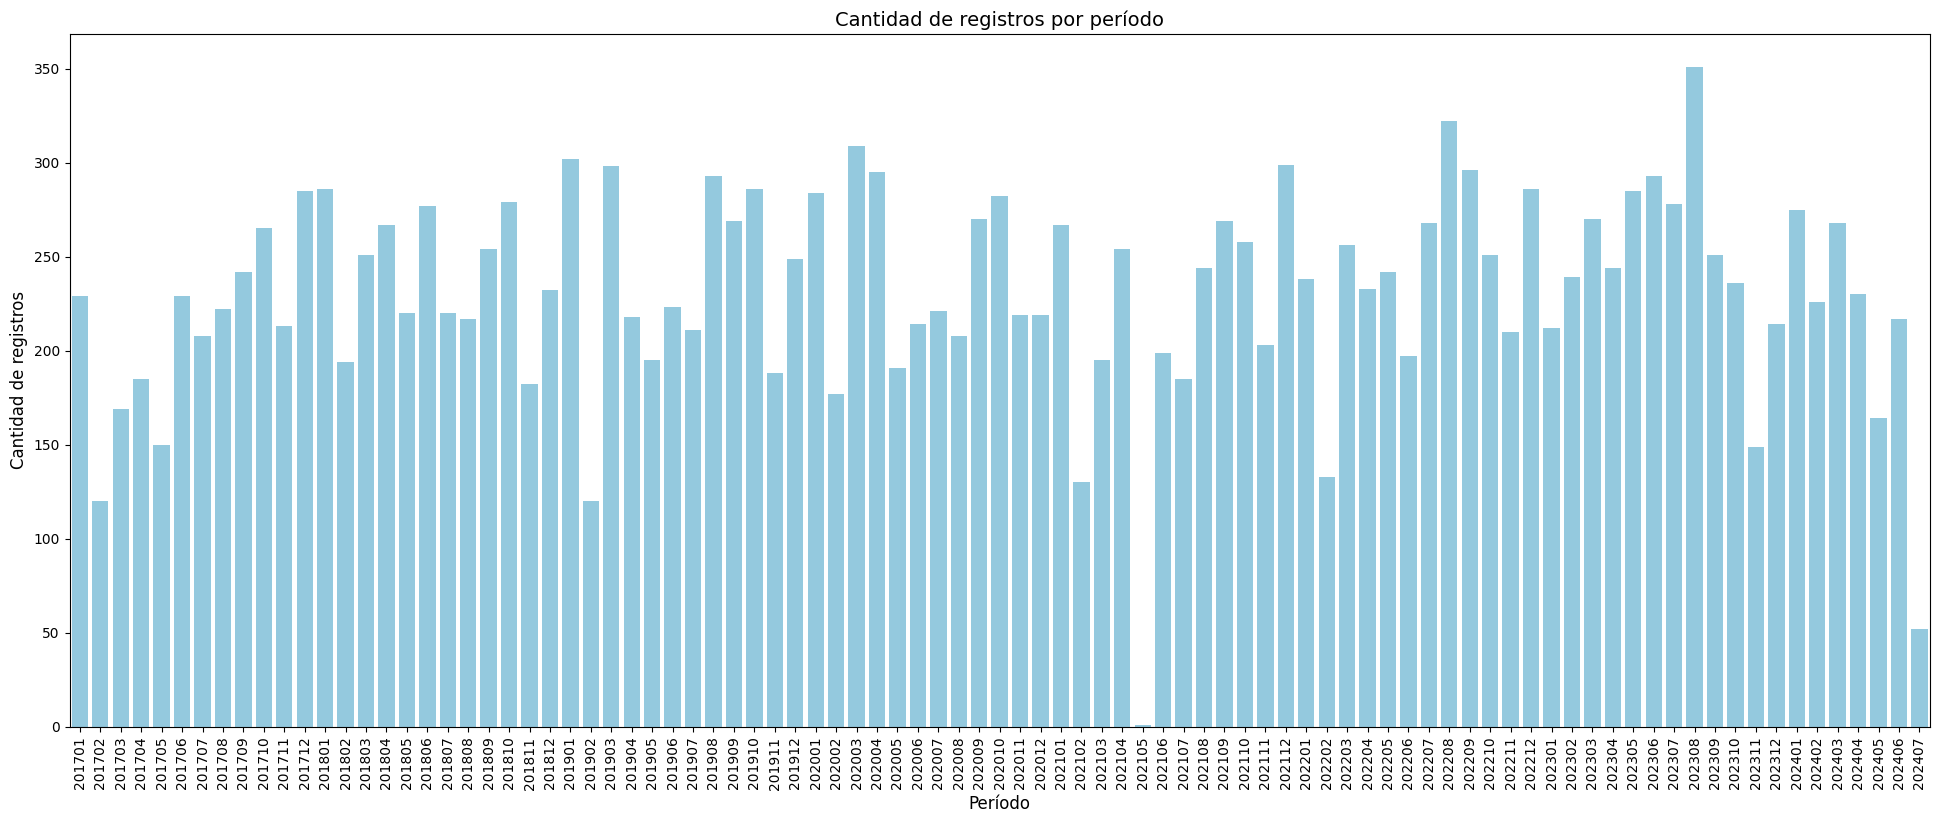

In [18]:
conteo_periodos = df['Período'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(24,9))
sns.barplot(x=conteo_periodos.index, y=conteo_periodos.values, color="skyblue")

plt.title("Cantidad de registros por período", fontsize=14)
plt.xlabel("Período", fontsize=12)
plt.ylabel("Cantidad de registros", fontsize=12)
plt.xticks(rotation=90)
plt.show()


A simple vista encontramos que hay una tendencia a que los periodos terminados en 02 (Es decir, periodos de febrero en cada año) tengan una menor cantidad de registros. Adicionalmente, encontramos que en el periodo de 202105 hubo muy pocos registros y en el 202407 hubo también una disminución importante.

###Continuar aquí el análisis de algunas columnas importantes.

In [5]:
cols_drop = [
    "Hacienda", "Nombre", "Suerte", 
    "Cod.Estado #", "Cod.Estado", 
    "Producto", "Cerca de", "Codigo Estacion"
]

df = df.drop(columns=cols_drop)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Zona                       21027 non-null  object        
 2   Tenencia                   21026 non-null  float64       
 3   Suelo                      17269 non-null  object        
 4   Area Neta                  21027 non-null  float64       
 5   Dist Km                    21022 non-null  float64       
 6   Variedad                   21027 non-null  object        
 7   F.Siembra                  21027 non-null  datetime64[ns]
 8   D.S.                       7168 non-null   object        
 9   Ult.Riego                  8470 non-null   datetime64[ns]
 10  Edad Ult Cos               21027 non-null  float64       
 11  F.Ult.Corte                21027 non-null  datetime64[ns]
 12  Dest

In [7]:
# Calcular % de nulos de las columnas restantes
null_percentages = df.isnull().mean()

# Seleccionar columnas con más del 80% de nulos
cols_drop_nulls = null_percentages[null_percentages > 0.7].index.tolist()

# Eliminar esas columnas del dataset
df = df.drop(columns=cols_drop_nulls)

print("Columnas eliminadas por >80% de nulos:")
print(cols_drop_nulls)

print("\nShape final del dataset:", df.shape)

Columnas eliminadas por >80% de nulos:
['%Infest.Diatrea', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ', 'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radicion Solar 0-3', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo']

Shape final del dataset: (21027, 52)


In [8]:
df.describe(include='all')

,Período,Zona,Tenencia,Suelo,Area Neta,Dist Km,Variedad,F.Siembra,D.S.,Ult.Riego,Edad Ult Cos,F.Ult.Corte,Destino 1=Semilla,Cod. T.Cultivo,Cultivo,Fec.Madur.,Dosis Madurante,Semanas mad.,TonUltCorte,TCH,TCHM,Ton.Azucar,Rdto,TAH,TAHM,Sac.Caña Precosecha,Edad.Precosecha,%Sac.Caña,%Sac.Muestreadora,%ATR,KATRHM,%Fibra Caña,%AR Jugo,%ME Min,%ME Veg,%ME Tot,Brix,Pureza,Vejez,Tipo Quema,T.Corte,Cosechó,Num.Riegos,M3 Riego,DDUlt.Riego,Lluvias (2 Meses Ant.),Lluvias Ciclo,Lluvias 0 -3,Lluvias tres a seis,Lluvias seis a nueve,Luvias 9 -FC,Fosfato Jugo
count,21027.000000,21027,21026.000000,17269,21027.000000,21022.000000,21027,21027,7168,8470,21027.00000,21027,21027.000000,21025.000000,21025,11252,20923.000000,11252.000000,21027.000000,21027.000000,21027.000000,20786.000000,20760.000000,20786.000000,20786.000000,19929.000000,8919.000000,20578.000000,19169.000000,20505.000000,20505.000000,19169.000000,18903.000000,19305.00000,19307.000000,19307.000000,20760.000000,20758.000000,18582.000000,21027,21027,21027,8438.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,21027.000000,19169.000000
unique,NaN,7,NaN,102,NaN,NaN,58,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,IP05,NaN,CORINTIAS,NaN,NaN,CC01-1940,NaN,1.65,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDE,MECANIZADO,AI08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7813,NaN,4042,NaN,NaN,9172,NaN,7148,NaN,NaN,NaN,NaN,NaN,20266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16204,17121,19043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,202039.708708,NaN,46.448730,NaN,8.642948,25.311806,NaN,2015-03-11 18:18:44.839492096,NaN,2020-02-16 21:24:26.351829760,13.01111,2020-10-27 09:01:09.339420672,0.013982,1.036100,NaN,2020-08-26 19:50:03.626021888,0.536335,9.588708,1141.737477,129.608509,10.050417,124.249246,10.733766,13.888988,1.071335,7.802876,12.360247,12.320202,12.834918,13.718671,1372.453892,15.275538,0.737819,0.63653,7.761020,8.600761,13.130479,77.805153,12.294125,NaN,NaN,NaN,7.215691,25725.851363,45.997717,75.116456,526.176110,122.333534,120.193700,118.080529,165.606631,332.501252
min,201701.000000,NaN,11.000000,NaN,0.004000,1.100000,NaN,1986-04-30 00:00:00,NaN,2016-01-12 00:00:00,1.31000,2017-01-02 00:00:00,0.000000,1.000000,NaN,2016-08-12 00:00:00,0.000000,-2.000000,0.420000,1.573653,0.138403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.086000,0.000000,7.750000,49.089172,0.000000,0.100000,0.00000,0.000000,0.200000,0.000000,0.000000,0.017000,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201812.000000,NaN,31.000000,NaN,3.310000,12.000000,NaN,2013-03-13 00:00:00,NaN,2018-03-07 00:00:00,11.93000,2018-12-14 00:00:00,0.000000,1.000000,NaN,2018-11-29 00:00:00,0.000000,6.571428,398.442500,108.691426,8.463211,42.282500,10.117175,11.690238,0.909263,0.000000,11.530000,11.619000,12.148700,13.015800,1165.486757,14.327400,0.568600,0.12100,6.786150,7.431900,13.470875,83.517250,2.108000,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.867800
50%,202010.000000,NaN,51.000000,NaN,7.000000,21.900000,NaN,2015-11-10 00:00:00,NaN,2019-08-14 00:00:00,12.62000,2020-10-11 00:00:00,0.000000,1.000000,NaN,2020-07-29 00:00:00,0.600000,8.571428,870.030000,129.479600,10.089412,93.736500,10.891450,14.014765,1.087821,0.000000,12.090000,12.370650,13.049400,13.753100,1383.492899,15.314600,0.700000,0.34170,8.085300,8.666000,14.310950,85.525000,2.737000,NaN,NaN,NaN,5.000000,0.000000,0.000000,24.000000,450.000000,71.000000,70.000000,69.000000,61.000000,289.000000
75%,202209.000000,NaN,51.000000,NaN,12.075000,32.700000,NaN,2018-08-07 00:00:00,NaN,2022-05-19 00:00:00,13.86000,2022-09-25 00:00:00,0.0000

In [9]:
#Filtro por correlación
corr = df.corr(numeric_only=True)[['TCH','%Sac.Caña']]
corr_tch = corr['TCH'][abs(corr['TCH']) > 0.1].index.tolist()
corr_sac = corr['%Sac.Caña'][abs(corr['%Sac.Caña']) > 0.1].index.tolist()
selected_vars = list(set(corr_tch + corr_sac))
selected_vars

['%Sac.Caña',
 'Ton.Azucar',
 '%Sac.Muestreadora',
 '%AR Jugo',
 'Destino 1=Semilla',
 '%ATR',
 'Lluvias (2 Meses Ant.)',
 'Sac.Caña Precosecha',
 'Edad.Precosecha',
 'Rdto',
 'Edad Ult Cos',
 'Brix',
 'Area Neta',
 'Período',
 'TonUltCorte',
 'Pureza',
 'TCH',
 'TCHM',
 '%ME Tot',
 'Luvias 9 -FC',
 'Vejez',
 'TAHM',
 'TAH',
 'Dosis Madurante',
 'Cod. T.Cultivo',
 'KATRHM']

In [10]:
X = df[selected_vars]
selector = VarianceThreshold(threshold=0.0)
X_vif = X.loc[:, selector.fit(X).get_support()]

In [11]:
# Reemplazar infinitos por NaN
X_vif = X_vif.replace([np.inf, -np.inf], np.nan)

# Eliminar filas con NaN
X_vif = X_vif.dropna()

# Ahora calcular VIF
vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif)

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


                  Variable           VIF
0                %Sac.Caña  70499.693383
1               Ton.Azucar    382.260650
2        %Sac.Muestreadora    778.554090
3                 %AR Jugo     38.117082
4        Destino 1=Semilla           NaN
5                     %ATR  22831.087438
6   Lluvias (2 Meses Ant.)      5.911704
7      Sac.Caña Precosecha     47.513702
8          Edad.Precosecha    132.659277
9                     Rdto  15230.588456
10            Edad Ult Cos   1606.029591
11                    Brix  37666.994534
12               Area Neta     64.524501
13                 Período  42119.621890
14             TonUltCorte    345.851133
15                  Pureza  31178.766722
16                     TCH  10014.932190
17                    TCHM  12839.562091
18                 %ME Tot     16.509457
19            Luvias 9 -FC      6.782414
20                   Vejez      2.094157
21                    TAHM  12502.756214
22                     TAH   9568.100229
23         Dosis

In [39]:
# Lista definitiva de variables independientes
vars_finales = [
    "Dosis Madurante", 
    "Vejez", 
    "Luvias 9 -FC", 
    "Lluvias (2 Meses Ant.)", 
    "Brix", 
    "Pureza", 
    "Sac.Caña Precosecha", 
    "%Sac.Muestreadora", 
    "Area Neta", 
    "Edad Ult Cos"
]

# Variables objetivo
vars_objetivo = ["TCH", "%Sac.Caña"]

# Subset del dataframe
df_eda = df[vars_objetivo + vars_finales]

# Verificar dimensiones
print("Shape final del dataset para EDA:", df_eda.shape)

# Verificar primeras filas
df_eda.head()

Shape final del dataset para EDA: (21027, 12)


,TCH,%Sac.Caña,Dosis Madurante,Vejez,Luvias 9 -FC,Lluvias (2 Meses Ant.),Brix,Pureza,Sac.Caña Precosecha,%Sac.Muestreadora,Area Neta,Edad Ult Cos
0,121.198333,13.7582,1.0,2.735,482.0,258.0,15.7464,87.2241,16.8172,13.508,6.00,12.81
1,93.793103,12.8430,0.0,73.823,0.0,0.0,15.2240,84.3602,NaN,12.551,1.45,11.14
2,174.347087,11.9364,1.1,2.108,457.0,246.0,14.1130,84.4527,14.7749,11.940,8.24,12.32
3,136.790476,11.2770,0.0,64.614,0.0,0.0,13.6350,82.7062,NaN,10.931,1.05,9.79
4,113.068432,10.2160,0.0,71.021,284.0,138.0,12.9760,78.7299,16.7662,10.294,4.53,11.53
